In [26]:
from pyspark.sql.functions import *
import pyspark as ps
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import numpy as np
import os
import json
import glob

In [27]:
spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("df capstone") \
            .getOrCreate()

dframe = spark.read.json('./data/mpd.slice.0-999.json', multiLine=True)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36275)
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:36275)

In [24]:
spark

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36275)
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:36275)

In [4]:
dframe.show()

+--------------------+--------------------+
|                info|           playlists|
+--------------------+--------------------+
|[2017-12-03 08:41...|[[false,, 1153241...|
+--------------------+--------------------+



In [5]:
playlist = dframe.head()[1]


In [6]:
single_playlist = playlist[0]

In [7]:
column_names = single_playlist.__fields__


In [8]:
pframe = pd.DataFrame(playlist, columns = column_names)

In [9]:
pframe

,collaborative,description,duration_ms,modified_at,name,num_albums,num_artists,num_edits,num_followers,num_tracks,pid,tracks
0,false,None,11532414,1493424000,Throwbacks,47,37,6,1,52,0,"[(The Cookbook, spotify:album:6vV5UrXcfyQD1wu4..."
1,false,None,11656470,1506556800,Awesome Playlist,23,21,5,1,39,1,"[(Eye Of The Tiger, spotify:album:4PT9VulQaQP6..."
2,false,None,14039958,1505692800,korean,51,31,18,1,64,2,"[(On And On, spotify:album:7hq1c0ZrLiSKxzhoRac..."
3,false,None,28926058,1501027200,mat,107,86,4,1,126,3,"[(French Festival, spotify:album:0T9YCy8TruLD6..."
4,false,None,4335282,1401667200,90s,16,16,7,2,17,4,"[(Mellon Collie and the Infinite Sadness, spot..."
...,...,...,...,...,...,...,...,...,...,...,...,...
995,false,None,9917901,1507852800,old,40,36,8,1,41,995,"[(Walkin' On Sunshine (Re-Recorded Versions), ..."
996,false,None,3699248,1479254400,Daze,17,15,13,1,17,996,"[(PARTYNEXTDOOR 3 (P3), spotify:album:2FXGUAES..."
997,false,None,27538723,1410307200,rap,98,82,63,1,119,997,"[(UP!, spotify:album:4I8VoaNOYQn92D8ejMPGlw, L..."
998,false,None,24950143,1507939200,Country,75,40,37,1,108,998,"[(Hunter Hayes (Encore), spotify:album:5hVo5O3..."


In [12]:
path_to_json = "./data/"
json_pattern = os.path.join(path_to_json,'*.json')
file_list = glob.glob(json_pattern)

In [13]:
file_list[:3]

['./data/mpd.slice.0-999.json',
 './data/mpd.slice.1000-1999.json',
 './data/mpd.slice.10000-10999.json']

## problem area -> 

In [25]:
list_of_frames = []
for file in file_list[:10]: 
    current_df = spark.read.json(file, multiLine=True)
    current_playlist = current_df.head()[1]
    current_pframe = pd.DataFrame(current_playlist, columns=column_names)
    list_of_frames.append(current_pframe)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:36275)
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:36275)

In [16]:
result = pd.concat(list_of_frames)

In [19]:
result.set_index('pid', inplace=True)

In [ ]:
## save result as pandas file for easy calling later

In [22]:
result.to_csv('fifty_frames.csv')

In [13]:
cleaned_frame = pframe.drop('tracks', axis=1).copy()
cleaned_frame.drop('name', axis=1, inplace=True)
cleaned_frame.drop('description', axis=1, inplace=True)
cleaned_frame.drop('modified_at', axis=1, inplace=True)

In [14]:
cleaned_frame

,collaborative,duration_ms,num_albums,num_artists,num_edits,num_followers,num_tracks,pid
0,false,11532414,47,37,6,1,52,0
1,false,11656470,23,21,5,1,39,1
2,false,14039958,51,31,18,1,64,2
3,false,28926058,107,86,4,1,126,3
4,false,4335282,16,16,7,2,17,4
...,...,...,...,...,...,...,...,...
995,false,9917901,40,36,8,1,41,995
996,false,3699248,17,15,13,1,17,996
997,false,27538723,98,82,63,1,119,997
998,false,24950143,75,40,37,1,108,998


In [15]:
# COLUMNS OF INTEREST ISOLATED INTO CLEAN FRAME IN 'df' VARIABLE:
df = cleaned_frame

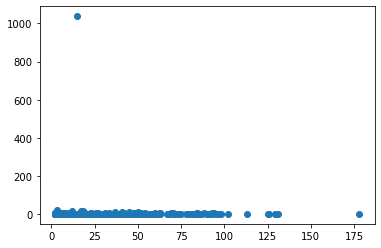

In [16]:
# comparing number of edits to number of followers. Data does not look interesting. 
plt.scatter(df.num_edits, df.num_followers)

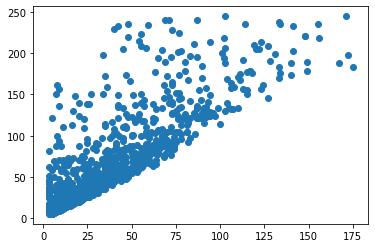

In [17]:
#comparing number of artists to number of tracks (playlist diversity?) - seems interesting, consistent ratio? 
plt.scatter(df.num_artists, df.num_tracks)
#explore plotting the line of completely diverse songs
#entropy of a group: think of a way to score the diversity numerically? (distance from the 1:1 ratio line, or, more simply: ratio of artists to tracks)

(array([287., 235., 157.,  94.,  68.,  54.,  34.,  28.,  24.,  19.]),
 array([  5.,  29.,  53.,  77., 101., 125., 149., 173., 197., 221., 245.]),
 <BarContainer object of 10 artists>)

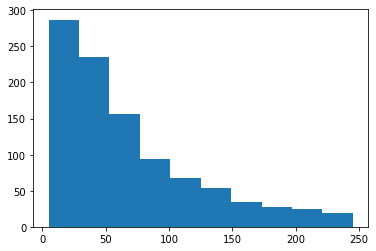

In [18]:
#looking at number of tracks
plt.hist(df.num_tracks)

(array([348., 256., 155.,  97.,  66.,  34.,  20.,  12.,   8.,   4.]),
 array([  3. ,  20.2,  37.4,  54.6,  71.8,  89. , 106.2, 123.4, 140.6,
        157.8, 175. ]),
 <BarContainer object of 10 artists>)

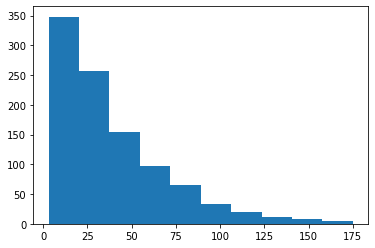

In [19]:
#looking at number of artists per playlist
plt.hist(df.num_artists)

In [20]:
df['diversity_ratio'] = df['num_artists'] / df['num_tracks']

In [21]:
df

,collaborative,duration_ms,num_albums,num_artists,num_edits,num_followers,num_tracks,pid,diversity_ratio
0,false,11532414,47,37,6,1,52,0,0.711538
1,false,11656470,23,21,5,1,39,1,0.538462
2,false,14039958,51,31,18,1,64,2,0.484375
3,false,28926058,107,86,4,1,126,3,0.682540
4,false,4335282,16,16,7,2,17,4,0.941176
...,...,...,...,...,...,...,...,...,...
995,false,9917901,40,36,8,1,41,995,0.878049
996,false,3699248,17,15,13,1,17,996,0.882353
997,false,27538723,98,82,63,1,119,997,0.689076
998,false,24950143,75,40,37,1,108,998,0.370370


(array([ 30.,  36.,  44.,  75., 101., 121., 158., 170., 150., 115.]),
 array([0.03703704, 0.13333333, 0.22962963, 0.32592593, 0.42222222,
        0.51851852, 0.61481481, 0.71111111, 0.80740741, 0.9037037 ,
        1.        ]),
 <BarContainer object of 10 artists>)

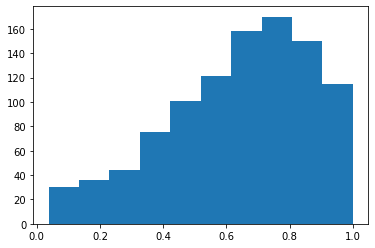

In [22]:
plt.hist(df.diversity_ratio)

In [23]:
df.corr()

,duration_ms,num_albums,num_artists,num_edits,num_followers,num_tracks,pid,diversity_ratio
duration_ms,1.000000,0.902956,0.819133,0.630271,0.006578,0.988350,0.034757,-0.342695
num_albums,0.902956,1.000000,0.956990,0.690599,-0.001986,0.904708,0.021650,-0.063753
num_artists,0.819133,0.956990,1.000000,0.681765,0.028290,0.822444,0.017248,0.108799
num_edits,0.630271,0.690599,0.681765,1.000000,0.003034,0.627979,0.033383,-0.032442
num_followers,0.006578,-0.001986,0.028290,0.003034,1.000000,0.015867,0.026420,0.011333
num_tracks,0.988350,0.904708,0.822444,0.627979,0.015867,1.000000,0.037734,-0.346304
pid,0.034757,0.021650,0.017248,0.033383,0.026420,0.037734,1.000000,-0.021482
diversity_ratio,-0.342695,-0.063753,0.108799,-0.032442,0.011333,-0.346304,-0.021482,1.000000


<AxesSubplot:>

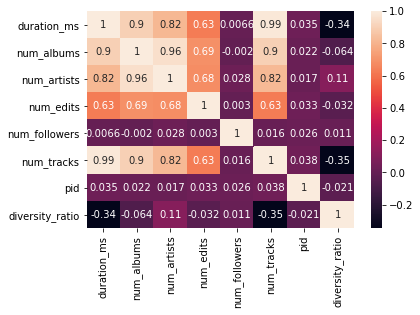

In [24]:
sn.heatmap(df.corr(), annot=True)

## Thoughts on hypothesis: 

- Could test H0 = the average playlist is 50% diverse OR LESS <- for the sample
- HA = the average playlist is more than 50% diverse
- right-tailed test, entire p-value is in right tail
- average from the sample is likely to be the average of the population?? <- separate test using confidence interval (sample vs. population) 
    - bootstrapping, confidence interval
- possible additional test: does diversity_ratio have an effect on follower count? 

In [ ]:
sample_mean = df.diversity_ratio.mean()
sample_mean

In [ ]:
sample_std = df.diversity_ratio.std()
sample_std

In [ ]:
sample_norm = stats.norm(sample_mean, sample_std)
null_norm = stats.norm(0.5, sample_std)

In [ ]:
right_tail = null_norm.ppf(.95)

fig, ax = plt.subplots()
x = np.linspace(-0.25,1.5,100)
ax.plot(x, null_norm.pdf(x), color='blue')
ax.plot(x, sample_norm.pdf(x), color='red')
ax.axvline(right_tail, color='blue', linestyle='dashed')
ax.axvline(sample_mean, color='red', linestyle='dashed')


In [ ]:
count_over_50 = df[df['diversity_ratio']>.5].count()
count_over_50['diversity_ratio']

In [ ]:
p_value = null_norm.cdf(sample_mean)
p_value

#### With 95% confidence, failed to reject the null hypothesis that playlists are on average less than 50% diverse.

### think about: 
- example hypothesis: playlists with a "high" number of followers have a higher diversity ratio
- can compare the diference between the "high follower" set and the "low follower" set to see if diversity ratio influences follower count
- t-test to see if you can confidently reject the null-hypothesis

In [25]:
less_than = df[df['num_followers'] < 10]

In [26]:
greater_equal = df[df['num_followers'] >= 10]

In [27]:
less_than_mean = less_than.diversity_ratio.mean()
less_than_mean

0.6386820910367528

In [28]:
greater_equal_mean = greater_equal.diversity_ratio.mean()
greater_equal_mean

0.6724998756095926

In [29]:
less_than_std = less_than.diversity_ratio.std()
less_than_std

0.2302076566364094

In [30]:
greater_equal_std = greater_equal.diversity_ratio.std()
greater_equal_std

0.2743546913898894

In [31]:
less_than_norm = stats.norm(less_than_mean, less_than_std)
greater_equal_norm = stats.norm(greater_equal_mean, greater_equal_std)

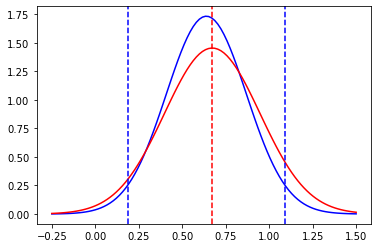

In [33]:
left_tail = less_than_norm.ppf(.025)
right_tail = less_than_norm.ppf(.975)


fig, ax = plt.subplots()
x = np.linspace(-0.25,1.5,100)
ax.plot(x, less_than_norm.pdf(x), color='blue')
ax.plot(x, greater_equal_norm.pdf(x), color='red')
ax.axvline(left_tail, color='blue', linestyle = 'dashed')
ax.axvline(right_tail, color='blue', linestyle='dashed')
ax.axvline(greater_equal_mean, color='red', linestyle='dashed')

#### run scipy.stats t-test to get p-value that backs up rejecting the null hypothesis
#### check to see if the diversity_ratio is normally distributed?? If no, bootstrapping for CLT sampling means